In [82]:
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime, timedelta

def get_day_array(date_string = "2018-02-11", days = 9):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    dates = []
    for i in range(days):
        previous_date = date - timedelta(days=i)
        dates.append(previous_date.strftime("%Y-%m-%d")) 
    dates.reverse()
    return dates

def elliason_palm_flux(mfx, mfy):
    # Specify the latitude and Coriolis parameter
    lat_rad = np.deg2rad(45)  # latitude in radians
    f = 2 * np.pi / (24 * 3600) * np.sin(lat_rad)  # Coriolis parameter

    # Calculate the zonal and meridional wind components from the momentum flux
    u = mfx / (f * np.cos(lat_rad))
    v = mfy / f

    # Calculate the derivatives of the wind components
    du_dx, _ = np.gradient(u)
    _, dv_dy = np.gradient(v)

    # Calculate the stress tensor
    tau_zonal = -mfx
    tau_meridional = -mfy

    # Calculate the Eliassen-Palm flux
    epf_zonal = tau_zonal * v - tau_meridional * u
    epf_meridional = tau_zonal * du_dx + tau_meridional * dv_dy
    
    return epf_zonal, epf_meridional

In [83]:
mfx = np.load('/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfx/2009-01-24_mfx.npz')['arr_0']
mfy = np.load('/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfy/2009-01-24_mfy.npz')['arr_0']

grid = map_grid(grid_size='40', source='airs')

lon = grid.nh_lon
lat = grid.nh_lat

In [84]:
# Create a grid of longitude and latitude values
lon = np.linspace(-180, 180, mfx.shape[1])
lat = np.linspace(-90, 90, mfx.shape[0])

# Create a longitude-latitude grid for plotting
lon_grid, lat_grid = np.meshgrid(lon, lat)

In [85]:
# grid_size = 40
# nh_lon = np.genfromtxt(f'coordinates_{grid_size}km_grid/Airs_nh_lon_{grid_size}_grid.csv', delimiter=',')
# nh_lat = np.genfromtxt(f'coordinates_{grid_size}km_grid/Airs_nh_lat_{grid_size}_grid.csv', delimiter=',')


In [86]:
np.shape(lon_grid)

(501, 501)

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_3292/3987896365.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu')


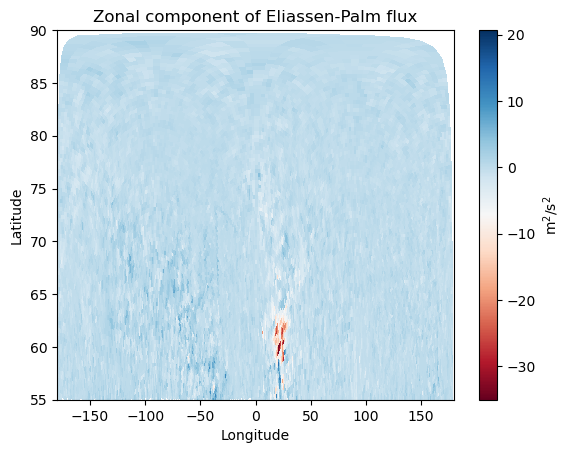

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_3292/3987896365.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_meridional, cmap='RdBu')


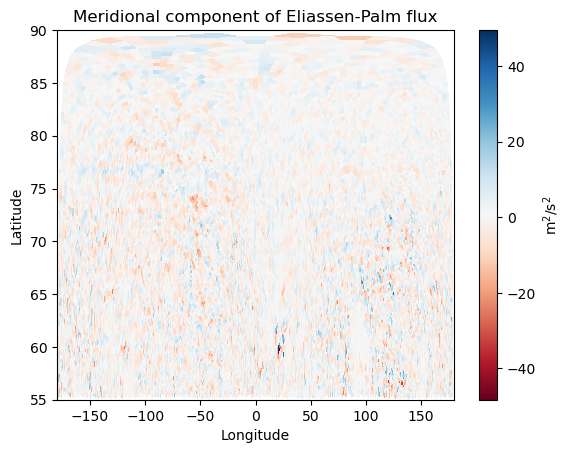

In [87]:
import numpy as np
import matplotlib.pyplot as plt

epf_zonal, epf_meridional = elliason_palm_flux(mfx, mfy)


# Create a grid of longitude and latitude values
lon = np.linspace(-180, 180, mfx.shape[1])
lat = np.linspace(-90, 90, mfx.shape[0])

# Plot the zonal component of the Eliassen-Palm flux
fig, ax = plt.subplots()
pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu')
ax.set_title('Zonal component of Eliassen-Palm flux')
fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_ylim([55, 90])

plt.show()

# Plot the meridional component of the Eliassen-Palm flux
fig, ax = plt.subplots()
pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_meridional, cmap='RdBu')
ax.set_title('Meridional component of Eliassen-Palm flux')
fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_ylim([55, 90])

plt.show()


In [95]:
days = 9
# dates = get_day_array(date_string="2018-02-12",days=days)
dates = get_day_array(date_string="2009-01-24",days=days)

data_dict = {}

for i in range(days):
    mfx = np.load(f'/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfx/{dates[i]}_mfx.npz')['arr_0']
    mfy = np.load(f'/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfy/{dates[i]}_mfy.npz')['arr_0']

    data_dict[f"mfx_{i+1}"] = mfx
    data_dict[f"mfy_{i+1}"] = mfy

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_3292/1789405749.py:19: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu', vmin=vmin, vmax=vmax)


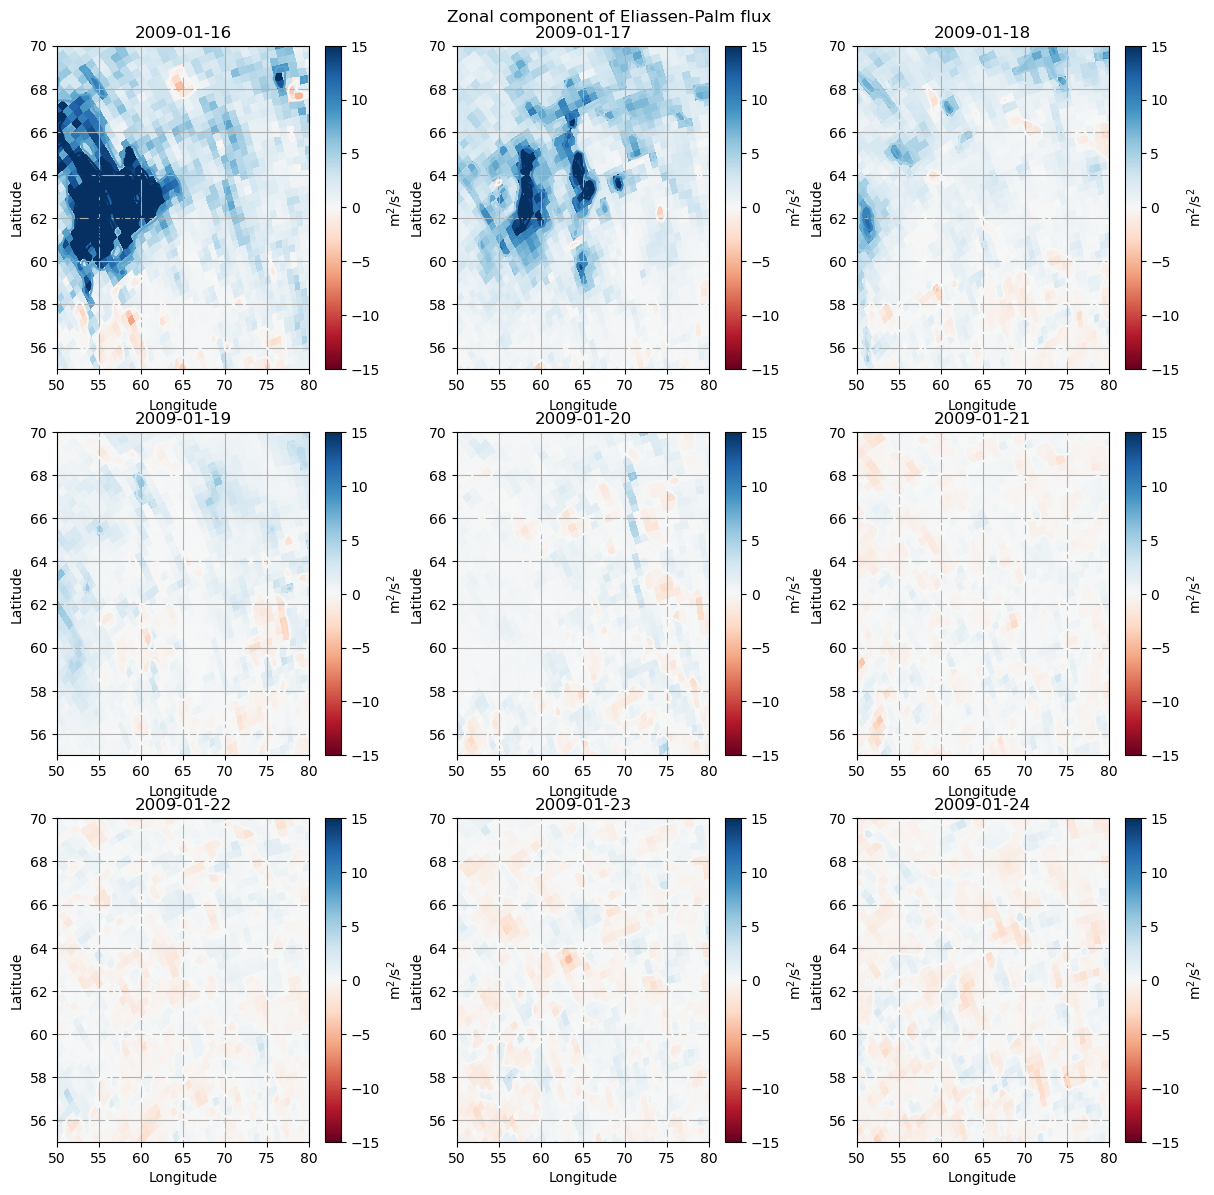

In [99]:
import numpy as np
import matplotlib.pyplot as plt


# Set up the figure with a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

# Set vmin and vmax for color range
vmin = -15
vmax = 15
data_i = 1

# Plot the zonal component of the Eliassen-Palm flux for each subplot
for i in range(3):
    for j in range(3):
        # get epf_zonal and epf_meridional for each day
        epf_zonal, epf_meridional = elliason_palm_flux(data_dict[f'mfx_{data_i}'], data_dict[f'mfy_{data_i}'])
        ax = axes[i, j]
        pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu', vmin=vmin, vmax=vmax)
        # add countour plot with 5 levels on the same vmin and vmax
        ax.contour(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu', levels=20, vmin=vmin, vmax=vmax)
        fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_xlim([50, 80])
        ax.set_ylim([55, 70])
        # add title to each subplot
        ax.set_title(f'{dates[data_i-1]}')
        ax.grid()
        # update data_i
        data_i += 1


# Plot the meridional component of the Eliassen-Palm flux for each subplot
# for i in range(3):
#     for j in range(3):
#         # get epf_zonal and epf_meridional for each day
#         epf_zonal, epf_meridional = elliason_palm_flux(data_dict[f'mfx_{data_i}'], data_dict[f'mfy_{data_i}'])
#         ax = axes[i, j]
#         pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_meridional, cmap='RdBu', vmin=vmin, vmax=vmax)
#         fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
#         ax.set_xlabel('Longitude')
#         ax.set_ylabel('Latitude')
#         ax.set_ylim([55, 90])
#         # add title to each subplot
#         ax.set_title(f'{dates[data_i-1]}')
#         ax.grid()
#         # update data_i
#         data_i += 1

# add title to plot and adjust spacing
fig.suptitle('Zonal component of Eliassen-Palm flux')
fig.tight_layout(pad=0.05)
# move title up a bit
fig.subplots_adjust(top=0.95)
plt.show()




In [98]:
np.shape(grid.nh_lon)

(501, 501)